In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
import math
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('El-Nino.csv',sep='\t')

In [6]:
data.head()

,Season,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


In [7]:
cols = ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [8]:
data.columns = cols

In [10]:
data.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
63,2013,-0.4,-0.4,-0.3,-0.2,-0.2,-0.3,-0.4,-0.4,-0.2,0.1,0.3,0.2
64,2014,0.1,0.0,0.2,0.4,0.6,0.7,0.6,0.6,0.6,0.8,1.0,1.2
65,2015,1.5,1.8,2.1,2.4,2.5,2.6,2.5,2.2,1.7,1.0,0.5,0.0
66,2016,-0.3,-0.6,-0.7,-0.7,-0.7,-0.6,-0.3,-0.1,0.1,0.3,0.4,0.4
67,2017,0.2,-0.1,-0.4,-0.7,-0.9,-1.0,-0.9,-0.8,-0.6,-0.4,-0.1,0.1


In [11]:
data.set_index('Year',inplace = True)

In [12]:
data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


### Transpose Data to Visualization

In [13]:
data = data.transpose()
data

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Jan,-0.5,0.7,-0.1,0.7,-0.6,-0.7,-0.6,1.3,0.6,-0.2,...,-0.4,0.5,-1.0,-0.5,0.3,-0.4,0.1,1.5,-0.3,0.2
Feb,-0.4,0.9,0.0,0.7,-0.8,-0.7,-0.6,1.3,0.4,-0.3,...,-0.3,0.5,-1.4,-0.7,0.3,-0.4,0.0,1.8,-0.6,-0.1
Mar,-0.4,1.0,0.2,0.8,-0.9,-1.1,-0.5,1.3,0.4,-0.1,...,-0.3,0.7,-1.6,-0.9,0.3,-0.3,0.2,2.1,-0.7,-0.4
Apr,-0.4,1.2,0.1,0.8,-0.8,-1.4,-0.4,1.4,0.4,0.0,...,-0.4,1.0,-1.7,-1.1,0.2,-0.2,0.4,2.4,-0.7,-0.7
May,-0.6,1.0,0.0,0.8,-0.7,-1.7,-0.4,1.5,0.5,0.0,...,-0.6,1.3,-1.7,-1.1,0.0,-0.2,0.6,2.5,-0.7,-0.9
Jun,-0.8,0.8,0.1,0.8,-0.7,-1.5,-0.4,1.7,0.6,0.0,...,-0.7,1.6,-1.6,-1.0,-0.2,-0.3,0.7,2.6,-0.6,-1.0
Jul,-0.8,0.5,0.4,0.8,-0.7,-1.1,-0.2,1.8,0.6,-0.1,...,-0.8,1.5,-1.4,-0.8,-0.4,-0.4,0.6,2.5,-0.3,-0.9
Aug,-0.5,0.4,0.6,0.5,-0.6,-0.8,0.1,1.7,0.6,-0.1,...,-0.7,1.3,-1.1,-0.6,-0.3,-0.4,0.6,2.2,-0.1,-0.8
Sep,-0.2,0.3,0.6,0.0,-0.7,-0.6,0.4,1.3,0.5,-0.1,...,-0.5,0.9,-0.8,-0.5,-0.2,-0.2,0.6,1.7,0.1,-0.6
Oct,0.2,0.3,0.7,-0.4,-0.8,-0.5,0.7,0.9,0.3,0.0,...,-0.2,0.4,-0.6,-0.4,-0.2,0.1,0.8,1.0,0.3,-0.4


### Generating dates to year-month-date

In [14]:
dates = pd.date_range(start = '1950-01', freq = 'MS', periods = len(data.columns)*12)
dates.shape

(816,)

Text(0.5,1,'Yearly Vs Monthly mean')

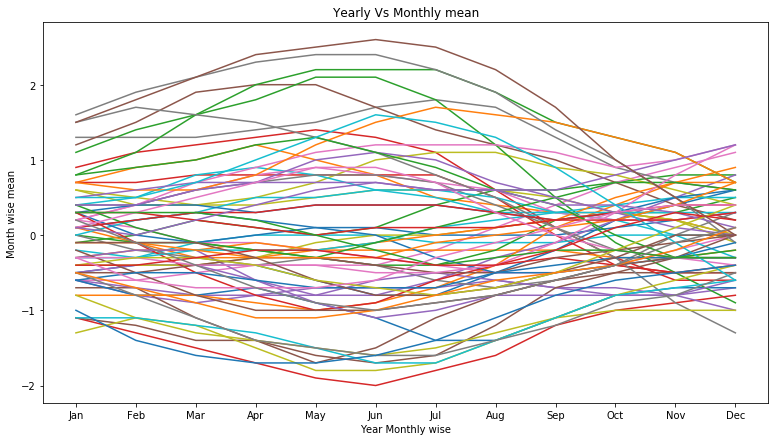

In [15]:
plt.figure(figsize=(13,7))
plt.plot(data)
plt.xlabel('Year Monthly wise')
plt.ylabel('Month wise mean')
plt.title('Yearly Vs Monthly mean')

### Box Plot

Text(0.5,1,'Monthly mean across all years')

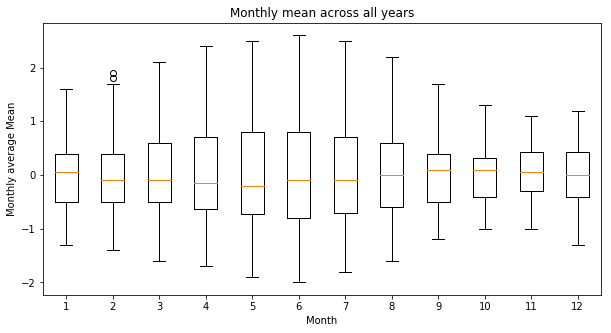

In [16]:
plt.figure(figsize=(10,5))
plt.boxplot(data)
plt.xlabel('Month')
plt.ylabel('Monthly average Mean')
plt.title('Monthly mean across all years')

### Box plot for average mean across all years

In [17]:
average = pd.DataFrame({'average_mean_year': data.mean(axis=0)})
average1 = average.transpose()
average1

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
average_mean_year,-0.283333,0.608333,0.35,0.375,-0.733333,-0.925,0.008333,1.291667,0.416667,-0.075,...,-0.366667,0.75,-1.15,-0.641667,-0.066667,-0.183333,0.566667,1.733333,-0.233333,-0.466667


Text(0.5,1,'Year vs Average')

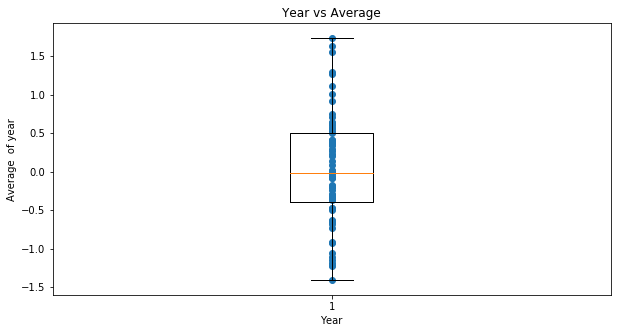

In [18]:
plt.figure(figsize=(10,5))
plt.boxplot(average1)
plt.scatter(x=[1] * len(average1.ix[0]), y=average1.ix[0])
plt.xlabel('Year')
plt.ylabel('Average  of year')
plt.title('Year vs Average')

In [19]:
data_np = data.transpose().as_matrix()

shape = data_np.shape
data_np = data_np.reshape((shape[0] * shape[1], 1))
data_np.shape

(816, 1)

In [20]:
data1 = pd.DataFrame({'Mean': data_np[:,0]})
data1.set_index(dates, inplace=True)

#test_data = data1.ix['2000': '2017']
#data1 = data1.ix[: '1999']
data1.head()

,Mean
1950-01-01,-0.5
1950-02-01,-0.4
1950-03-01,-0.4
1950-04-01,-0.4
1950-05-01,-0.6


In [21]:
data1.shape

(816, 1)

### Now visualize the data

Text(0.5,1,'Year vs Monthly Mean')

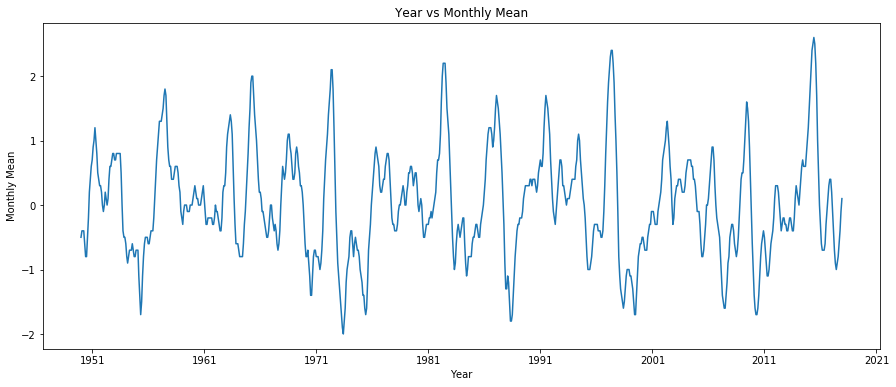

In [22]:
plt.figure(figsize=(15,6))
plt.plot(data1)
plt.xlabel('Year')
plt.ylabel('Monthly Mean')
plt.title('Year vs Monthly Mean')

### To see the insights of data we need to decompose it

In [23]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

decomposition = sm.tsa.seasonal_decompose(data1,model='additive')

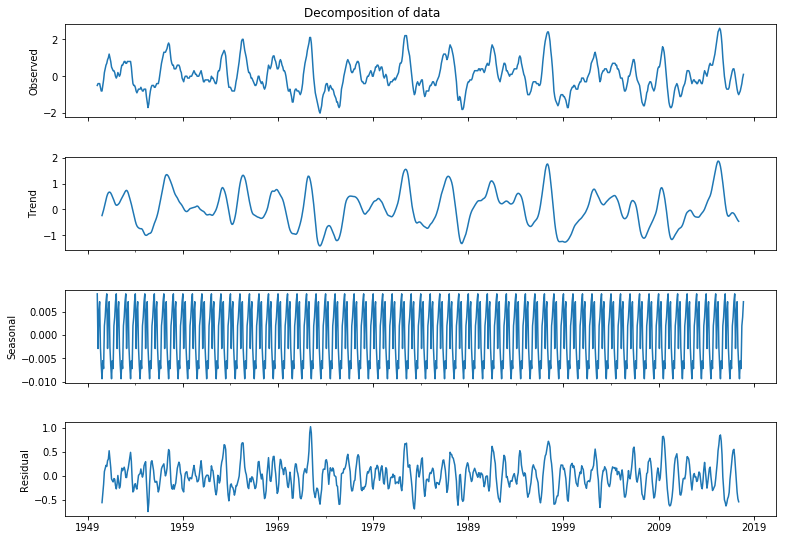

In [24]:
fig = decomposition.plot()
fig.set_figheight(8)
fig.set_figwidth(12)
fig.suptitle('Decomposition of data')
plt.show()

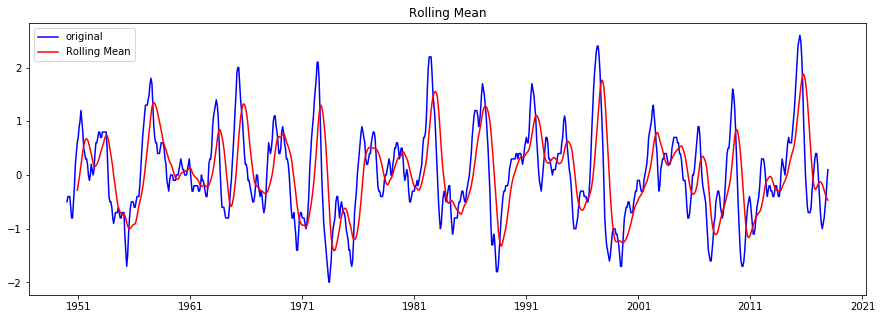

In [25]:
#12 Month-Average

plt.figure(figsize = (15,5))
movingAverage12 = data1.rolling(window=12).mean()
plt.plot(data1, color = 'blue', label = 'original')
plt.plot(movingAverage12, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean')
plt.show()


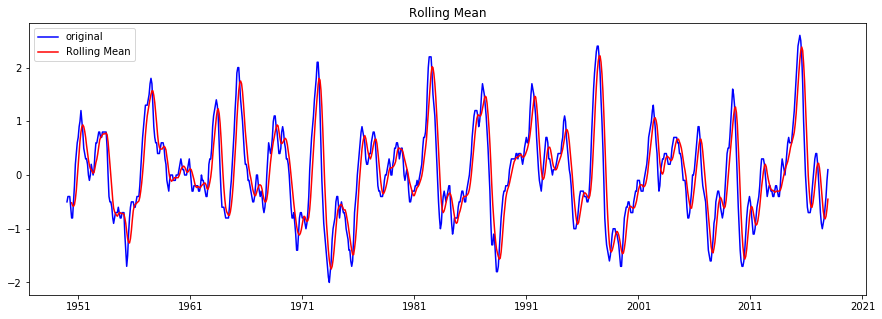

In [26]:
#6 Month-Average

plt.figure(figsize = (15,5))
movingAverage6 = data1.rolling(window=6).mean()
plt.plot(data1, color = 'blue', label = 'original')
plt.plot(movingAverage6, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean')
plt.show()

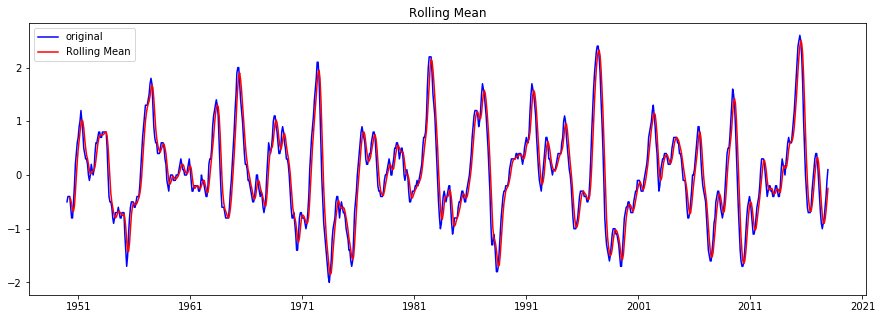

In [27]:
#4 Month-Average

plt.figure(figsize = (15,5))
movingAverage4 = data1.rolling(window=4).mean()
plt.plot(data1, color = 'blue', label = 'original')
plt.plot(movingAverage4, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean')
plt.show()

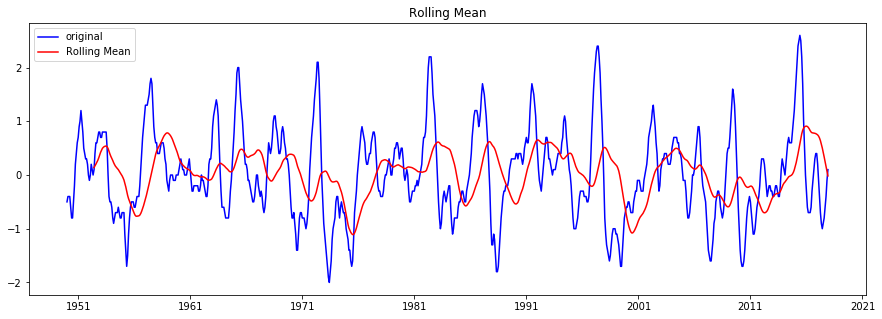

In [28]:
#30 days-Average

plt.figure(figsize = (15,5))
movingAverage30 = data1.rolling(window=30).mean()
plt.plot(data1, color = 'blue', label = 'original')
plt.plot(movingAverage30, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean')
plt.show()

### Lets keep window size as 30

In [29]:

def test_stationarity(timeseries):
    
    #Determine Rolling Statistics
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()
    
    # Plot Rolling Statistics
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color = 'blue', label = 'original')
    rollmean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    rollstd = plt.plot(movingSTD, color = 'black', label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Rolling STD')
    plt.show()
    
    # Perform Dicky-fuller test
    print('Dicky-fuller test')
    dftest = adfuller(timeseries['Mean'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'No of Lags used:', 'Number of Observation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)

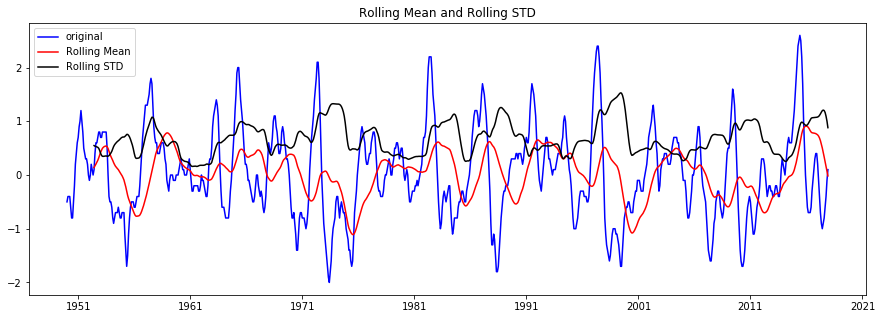

Dicky-fuller test
Test Statistic               -6.830861e+00
p-value                       1.895311e-09
No of Lags used:              1.600000e+01
Number of Observation used    7.990000e+02
Critical value (1%)          -3.438561e+00
Critical value (5%)          -2.865164e+00
Critical value (10%)         -2.568700e+00
dtype: float64


In [30]:
test_stationarity(data1)

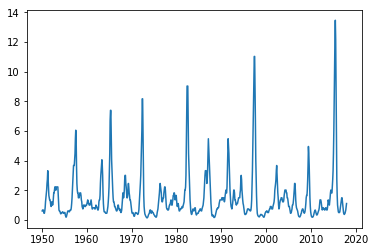

In [76]:
# # Estimate Trend
# X_logScale = np.exp(data1)
# plt.plot(X_logScale)

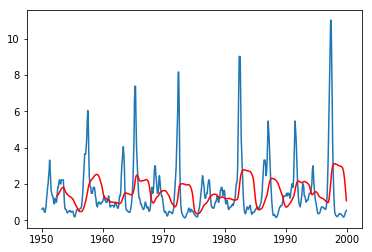

In [27]:
# # Now calculate moving average with logScale

# movingAverage = X_logScale.rolling(window=30).mean()
# movingSTD = X_logScale.rolling(window=30).std()
# plt.plot(X_logScale)
# plt.plot(movingAverage,color='red')
# #plt.plot(movingSTD,color='blue')

In [77]:
# X_logScaleMinusmovingAverage = X_logScale - movingAverage
# X_logScaleMinusmovingAverage.head()

# #drop nan values
# X_logScaleMinusmovingAverage.dropna(inplace = True)
# X_logScaleMinusmovingAverage.head()

,Mean
1952-06-01,-0.224142
1952-07-01,0.133002
1952-08-01,0.424903
1952-09-01,0.386509
1952-10-01,0.533362


In [78]:
# from statsmodels.tsa.stattools import adfuller
# def test_stationarity(timeseries):
    
#     #Determine Rolling Statistics
#     plt.figure(figsize=(15,5))
#     movingAverage = timeseries.rolling(window=30).mean()
#     movingSTD = timeseries.rolling(window=30).std()
    
#     # Plot Rolling Statistics
#     orig = plt.plot(timeseries, color = 'blue', label = 'original')
#     rollmean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
#     rollstd = plt.plot(movingSTD, color = 'black', label = 'Rolling STD')
#     plt.legend(loc = 'best')
#     plt.title('Rolling Mean and Rolling STD')
#     plt.show()
    
#     # Perform Dicky-fuller test
#     print('Dicky-fuller test')
#     dftest = adfuller(timeseries['Mean'], autolag = 'AIC')
#     dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'No of Lags used:', 'Number of Observation used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical value (%s)' %key] = value
#     print(dfoutput)
        

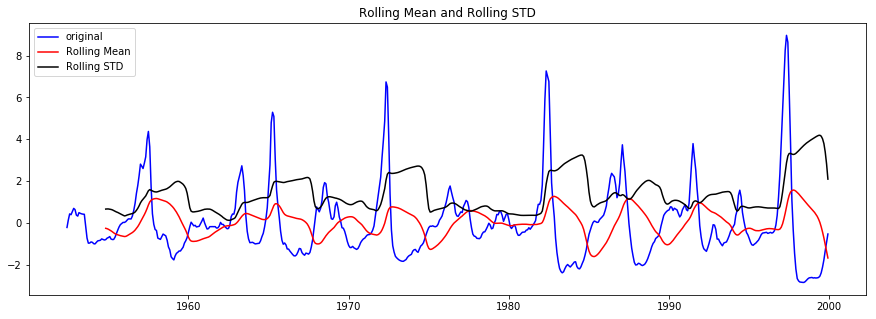

Dicky-fuller test
Test Statistic               -7.356775e+00
p-value                       9.733770e-11
No of Lags used:              4.000000e+00
Number of Observation used    5.660000e+02
Critical value (1%)          -3.441956e+00
Critical value (5%)          -2.866660e+00
Critical value (10%)         -2.569497e+00
dtype: float64


In [79]:
# test_stationarity(X_logScaleMinusmovingAverage)

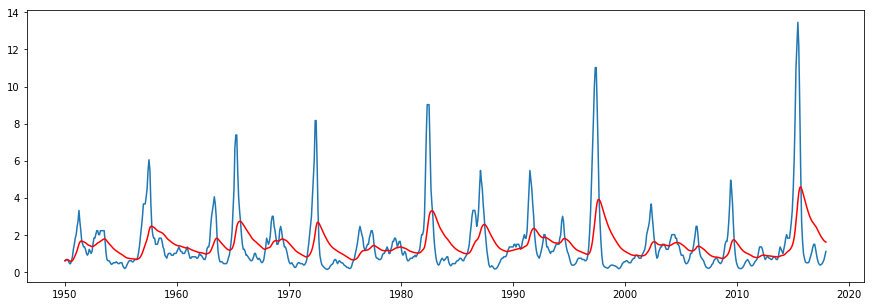

In [80]:
# plt.figure(figsize=(15,5))
# exponentialDecayWeightedAverage = X_logScale.ewm(halflife = 12, min_periods=0, adjust=True).mean()
# plt.plot(X_logScale)
# plt.plot(exponentialDecayWeightedAverage,color='red')

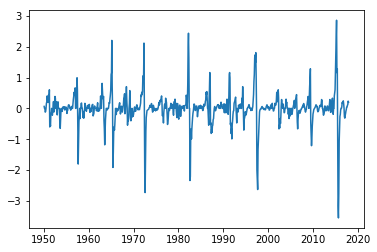

In [81]:
# datasetLogDiffShifting = X_logScale - X_logScale.shift()
# plt.plot(datasetLogDiffShifting)

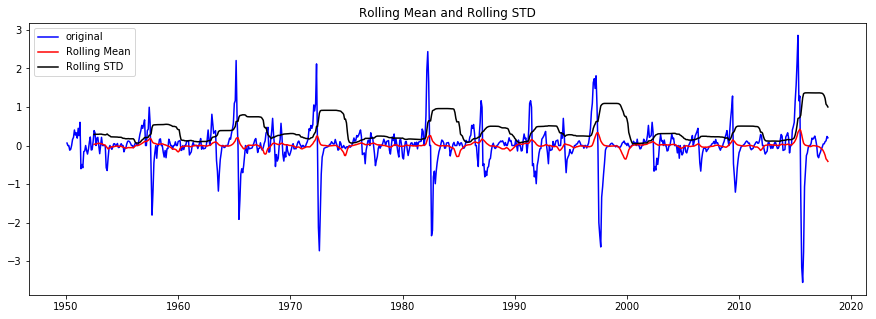

Dicky-fuller test
Test Statistic               -1.182652e+01
p-value                       8.178992e-22
No of Lags used:              8.000000e+00
Number of Observation used    8.060000e+02
Critical value (1%)          -3.438489e+00
Critical value (5%)          -2.865133e+00
Critical value (10%)         -2.568683e+00
dtype: float64


In [82]:
# datasetLogDiffShifting.dropna(inplace = True)
# test_stationarity(datasetLogDiffShifting)

### Plot ACF and PACF graphs

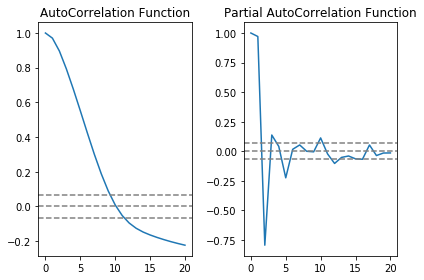

In [32]:
# ACF and PACF Plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(data1, nlags = 20)
lag_pacf = pacf(data1, nlags =20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle ='--', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(data1)),linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(data1)), linestyle = '--', color = 'gray')
plt.title('AutoCorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle ='--', color='gray')
plt.axhline(y = -1.96/np.sqrt(len(data1)),linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(data1)), linestyle = '--', color = 'gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()


In [38]:
data1.isna().sum()

Mean    0
dtype: int64

Plotting AR model


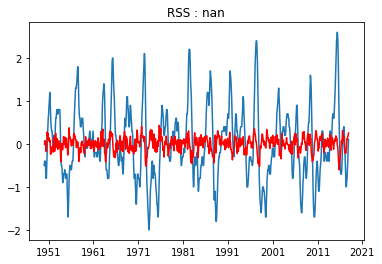

In [56]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(data1, order =(2,1,8))
results_AR = model.fit(disp = -1)
plt.plot(data1)
plt.plot(results_AR.fittedvalues, color = 'red')
#plt.title('RSS : %.4f' % (sum(results_AR.fittedvalues - data1['Mean'])**2))
print('Plotting AR model')

Plotting MA model


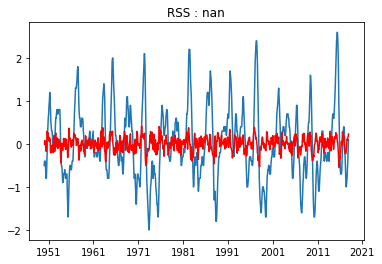

In [57]:
#MA Model

model = ARIMA(data1, order =(0,1,8))
results_MA = model.fit(disp = -1)
plt.plot(data1)
plt.plot(results_MA.fittedvalues, color = 'red')
#plt.title('RSS : %.4f' % (sum(results_MA.fittedvalues - data1['Mean'])**2))
print('Plotting MA model')

Plotting ARIMA model


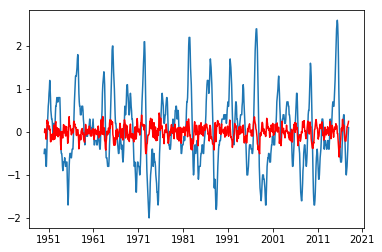

In [58]:
model = ARIMA(data1, order =(1,1,10))
results_ARIMA = model.fit(disp = -1)
plt.plot(data1)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
#plt.title('RSS : %.4f' % (sum(results_ARIMA.fittedvalues - data1['Mean'])**2))
print('Plotting ARIMA model')

In [59]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True )
print(predictions_ARIMA_diff.head())

1950-02-01   -0.000075
1950-03-01    0.074044
1950-04-01   -0.023120
1950-05-01   -0.011628
1950-06-01   -0.166315
Freq: MS, dtype: float64


In [60]:
# Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

1950-02-01   -0.000075
1950-03-01    0.073969
1950-04-01    0.050849
1950-05-01    0.039221
1950-06-01   -0.127095
Freq: MS, dtype: float64


In [61]:
predictions_ARIMA_log = pd.Series(data1['Mean'].ix[0], index = data1.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

1950-01-01   -0.500000
1950-02-01   -0.500075
1950-03-01   -0.426031
1950-04-01   -0.449151
1950-05-01   -0.460779
Freq: MS, dtype: float64

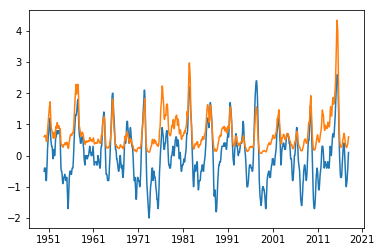

In [62]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data1)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f' % np.sqrt(sum((predictions_ARIMA-data1)**2)/len(data1)))

In [115]:
data1.shape

(816, 1)

In [116]:
data1.head()

,Mean
1950-01-01,-0.5
1950-02-01,-0.4
1950-03-01,-0.4
1950-04-01,-0.4
1950-05-01,-0.6


In [129]:
data1.tail()

,Mean
2017-08-01,-0.8
2017-09-01,-0.6
2017-10-01,-0.4
2017-11-01,-0.1
2017-12-01,0.1


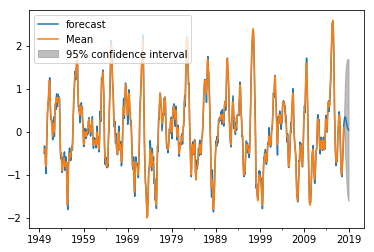

<Figure size 1080x360 with 0 Axes>

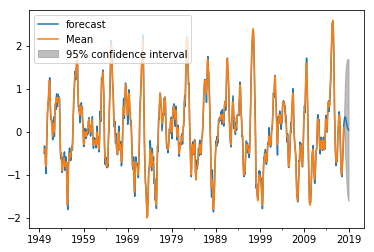

In [63]:
plt.figure(figsize=(15,5))
results_ARIMA.plot_predict(1,828)

In [64]:
results_ARIMA.forecast(steps=12)

(array([ 0.24424127,  0.30583652,  0.34415889,  0.35280196,  0.33032783,
         0.28722531,  0.23786118,  0.18658981,  0.13877211,  0.10702962,
         0.08211435,  0.06255442]),
 array([ 0.11641271,  0.24446932,  0.3770758 ,  0.48356299,  0.56814433,
         0.63975676,  0.70149241,  0.74954309,  0.78562715,  0.8104595 ,
         0.82536767,  0.83440832]),
 array([[ 0.01607656,  0.47240599],
        [-0.17331454,  0.78498757],
        [-0.3948961 ,  1.08321388],
        [-0.59496409,  1.30056801],
        [-0.78321459,  1.44387024],
        [-0.96667491,  1.54112552],
        [-1.13703868,  1.61276105],
        [-1.28248765,  1.65566728],
        [-1.40102881,  1.67857303],
        [-1.4814418 ,  1.69550105],
        [-1.53557655,  1.69980525],
        [-1.57285584,  1.69796467]]))